# Decision Tree

Submitted By: Anish Bhusal

Date of Submission: 3rd April,2020


Project-II

Fuse.AI Microdegree Program : ML 

Dataset: UCI-ML Heart Disease Dataset


**Contents**
1. Import Necessary Libraries and Dataset
2. Data Cleaning
3. Data Analysis and Visualization
4. Feature Extraction and Normalization
5. Grid Search
6. Model Evalutation

### 1 . Import Necessary Libraries and Dataset

Import Necessary Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score
from sklearn import metrics

**Read Dataset**

Read train dataset and test dataset from two separate files.

In [3]:
train_df=pd.read_csv("../../data/Project-II/Heart_train.csv")
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
1,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
2,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
3,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
4,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


In [4]:
test_df=pd.read_csv("../../data/Project-II/Heart_test.csv")
test_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
1,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
2,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
3,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
4,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1


### 2. Data Cleaning


In [5]:
#check if there are any NaN values
train_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
test_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 3. Data Analysis and Visualization

In [7]:
train_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Dataset Information:

[UCI Heart-Disease Data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

- age
- sex (1 male, 0 female)
- chest pain type (4 values)

     - Value 1: typical angina
     - Value 2: atypical angina
     - Value 3: non-anginal pain
     - Value 4: asymptomatic
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Targets:
- 0: Has Disease
- 1: No Disease

In [8]:
print("Shape of training set: {} and test set: {}".format(train_df.shape,test_df.shape))

Shape of training set: (242, 14) and test set: (61, 14)


Let's see the distribution of age in training set: 

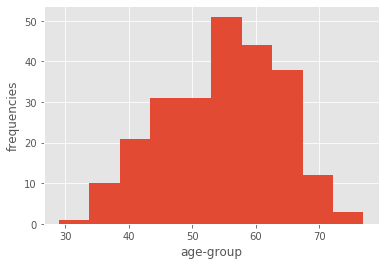

In [9]:
plt.style.use('ggplot')
plt.hist(train_df.age,bins=10)
plt.xlabel("age-group")
plt.ylabel("frequencies")
plt.show()

The histogram plot shows dataset consists of maximum data from people of age group 50-60.

Now, let's analysis heart disease by sex: 

In [10]:
number_of_males_having_heart_disease=len(train_df[(train_df["sex"]==1) & (train_df["target"]==1)])
number_of_males_not_having_heart_disease=len(train_df[(train_df["sex"]==1) & (train_df["target"]==0)])
number_of_females_having_heart_disease=len(train_df[(train_df["sex"]==0) & (train_df["target"]==1)])
number_of_females_not_having_heart_disease=len(train_df[(train_df["sex"]==0) & (train_df["target"]==0)])

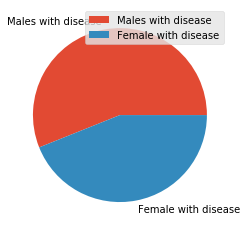

In [11]:
plt.pie(x=(number_of_males_having_heart_disease,number_of_females_having_heart_disease),labels=["Males with disease","Female with disease"])
plt.legend()
plt.show()

Text(0, 0.5, 'Sex 0:female 1:male')

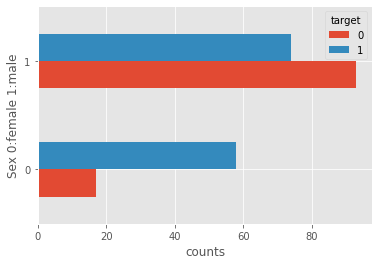

In [12]:
pd.crosstab(train_df.sex,train_df.target).plot(kind='barh');
plt.xlabel("counts")
plt.ylabel("Sex 0:female 1:male")

As we can see, the number of males having heart disease is little high than number of females. This figure shows that male are more vulnerable to heart disease.

Correlations between features and target

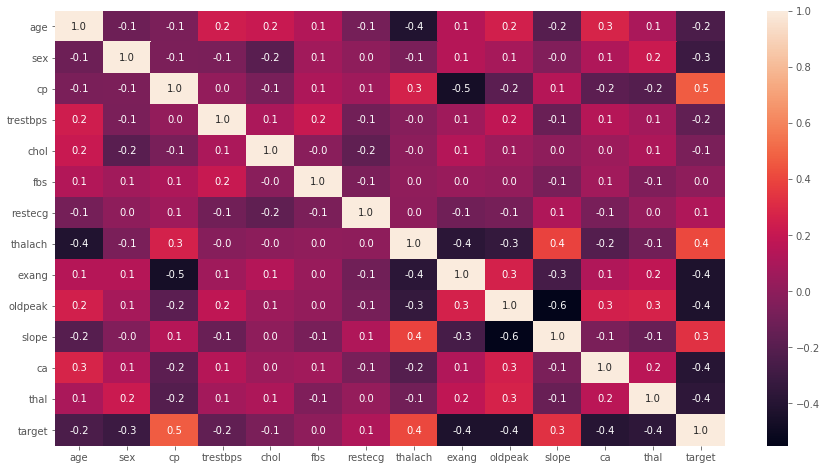

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, fmt= '.1f')
plt.show()

This correlation plot shows that chest pain type "cp" and "thalach" have highest positive correlation whereas "exang","oldpeak","ca","thal" have highest negative correlation with heart disease.

Text(0, 0.5, 'Chest Pain')

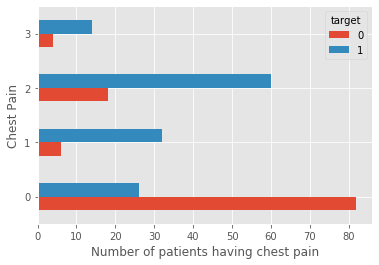

In [14]:
pd.crosstab(train_df.cp,train_df.target).plot(kind='barh');
plt.xlabel("Number of patients having chest pain")
plt.ylabel("Chest Pain")

This plot shows that people having chestpain of type 2 are more likely to have heart disease.

------------------
Let's analyze the relation of blood pressure, cholesterol level with heart disease.

In [15]:
train_df.chol.unique()

array([212, 246, 234, 308, 200, 250, 222, 193, 295, 157, 260, 195, 269,
       313, 330, 275, 564, 288, 213, 325, 201, 228, 207, 172, 167, 254,
       178, 263, 183, 149, 315, 304, 232, 223, 282, 248, 354, 220, 409,
       203, 182, 233, 407, 204, 197, 208, 249, 271, 298, 211, 177, 239,
       240, 255, 278, 244, 311, 174, 417, 214, 302, 216, 229, 283, 180,
       199, 242, 289, 258, 219, 243, 187, 273, 230, 217, 215, 231, 218,
       175, 168, 340, 253, 294, 256, 245, 261, 225, 309, 185, 303, 266,
       226, 268, 237, 210, 335, 259, 276, 131, 227, 192, 188, 267, 274,
       176, 221, 166, 235, 186, 326, 198, 286, 196, 257, 265, 236, 160,
       164, 126, 322, 299, 224, 205, 277, 360, 307, 264, 321, 247, 353,
       206, 342])

/home/nemo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nemo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


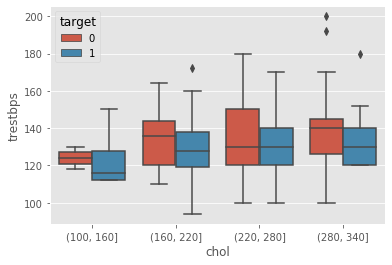

In [16]:
temp_df=train_df[['trestbps','target']]
temp_df['chol']=pd.cut(train_df['chol'],bins=[100,160,220,280,340])
temp_df['age']=pd.cut(train_df['age'],bins=[10,20,30,40,50,60,70,80,90])
sns.boxplot(x='chol',y='trestbps',hue='target',data=temp_df);

Box plot showing how cholesterol level and resting blood pressure are likely to account for heart disease

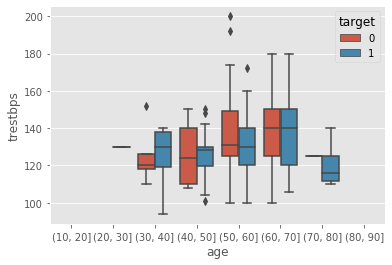

In [17]:
sns.boxplot(x='age',y='trestbps',hue='target',data=temp_df);

This box plot shows people of age group 60-70 with bps in range 120-150 are more likely to have heart disease and people of age group 30-40 with bps range 120-140 are also more vulnerable to heart disease

Now let's visualize how maximum heart rate achieved is related with heart disease

In [18]:
train_df.thalach.unique() ##unique values of max heart rate achieved 

array([150, 173, 145, 170, 126, 187, 143, 161, 162, 182, 185, 179, 163,
       133, 169, 139, 160, 165, 172, 120, 168, 158, 114, 127,  96, 147,
       125,  95, 122, 152, 132, 174, 154, 177, 156, 148, 159, 144, 140,
       175, 157, 151, 115, 195, 149, 188, 137, 111, 155, 142,  97, 146,
       134, 153, 131, 166, 180, 128, 141, 118, 178, 171,  71, 124, 192,
       130, 194, 112, 103, 167,  90, 164, 190, 181, 116, 123, 138, 136,
       109, 121, 184, 108, 105, 186,  88, 202,  99, 113])

/home/nemo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Max Heart Rate Achieved')

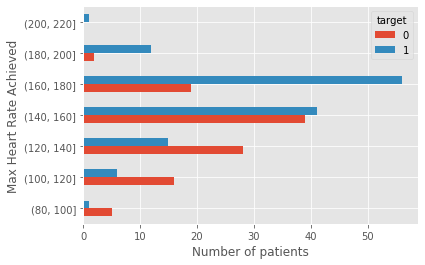

In [19]:
temp_df['thalach']=pd.cut(train_df.thalach,bins=[80,100,120,140,160,180,200,220])
pd.crosstab(temp_df.thalach,train_df.target).plot(kind='barh');
plt.xlabel("Number of patients")
plt.ylabel("Max Heart Rate Achieved")

This plot shows that patients whose max heart was between 160-180 had higher number of cases of heart disease than others. 

### 4. Feature Extraction and Normalization

There are four columns in the dataset ['cp','exang','slope','thal'] which are categorical. Let's first encode them using One-Hot-Encoder

In [20]:
cat_columns = ['cp', 'exang', 'slope', 'thal'] #categorical columns
num_columns = [c for c in train_df.columns if c not in cat_columns] #numerical columns
print("categorical columns:",cat_columns)
print("numerical columns: ",num_columns)

categorical columns: ['cp', 'exang', 'slope', 'thal']
numerical columns:  ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'ca', 'target']


In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore')

In [22]:
encoder.fit(train_df[cat_columns])
train_cat_encoded=encoder.transform(train_df[cat_columns])
column_names=encoder.get_feature_names(input_features=cat_columns)
train_df_cat_encoded=pd.DataFrame(train_cat_encoded.todense(),columns=column_names,index=train_df.index)
train_df_cat_encoded

,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
238,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
239,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
240,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# encoder.fit(test_df[cat_columns])
test_cat_encoded=encoder.transform(test_df[cat_columns])
column_names=encoder.get_feature_names(input_features=cat_columns)
test_df_cat_encoded=pd.DataFrame(test_cat_encoded.todense(),columns=column_names,index=test_df.index)
test_df_cat_encoded

,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
57,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
58,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
59,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
train_df_encoded=pd.concat([train_df[num_columns],train_df_cat_encoded],axis=1)
train_df_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [25]:
test_df_encoded=pd.concat([test_df[num_columns],test_df_cat_encoded],axis=1)
test_df_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [26]:
train_df_encoded.shape

(242, 23)

In [27]:
test_df_encoded.shape

(61, 23)

Split dataset

In [28]:
X_train=train_df_encoded[train_df_encoded.columns.difference(['target'])]
y_train=train_df_encoded.target

X_test=test_df_encoded[test_df_encoded.columns.difference(['target'])]
y_test=test_df_encoded.target

### 5. Model Building and Grid Search

In [29]:
grid_params = {
    'max_depth': (3, 5, 7, 9, 11, 13),
    'min_samples_split': (2, 4, 6, 8, 10)
}

In [30]:
scorer=make_scorer(f1_score,average='macro')
clf=GridSearchCV(DecisionTreeClassifier(),grid_params,scoring=scorer)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': (3, 5, 7, 9, 11, 13),
               

In [31]:
print("The best score is: {} with params {}".format(clf.best_score_,clf.best_params_))

The best score is: 0.782651131239958 with params {'max_depth': 5, 'min_samples_split': 10}


### 6. Model Evaluation

In [33]:
model=DecisionTreeClassifier(random_state=1,max_depth=5,min_samples_split=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.73      0.73      0.73        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



#### Save Model

In [34]:
import pickle
pickle.dump(model,open("DT_UCIML_heart_disease_saved_model","wb")) #save model 